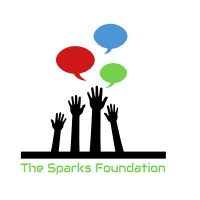

# Author: Shiwang Agarwal
Student, Goa Institute of Management, 2021

Task 1- Prediction using Supervised Machine Learning

# Problem Statement

Predict the percentage of an student based on the no. of study hours.

In [3]:
#Supress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Libraries

In [18]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

# Importing Dataset

In [7]:
# Reading data from remote link
data_df = pd.read_excel('C:/Users/lenovo/Downloads/GRIP/assignment.xlsx')
print("Data imported successfully")

data_df.head(5)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
data_df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [13]:
data_df.shape

(25, 2)

As we can see that there are 25 rows and 2 columns in the dataset.

# Data Exploration

In [14]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [15]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Correlation

In [16]:
data_df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Data Visualization

plot our data points on 2-D graph to visualize our dataset and see if we can manually find any relationship between the data.

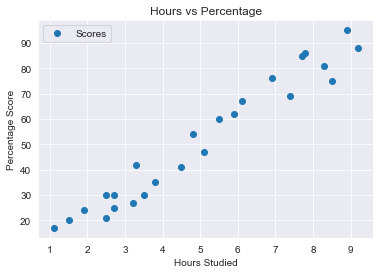

In [19]:
# Plotting the distribution of scores
sns.set_style('darkgrid')
data_df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

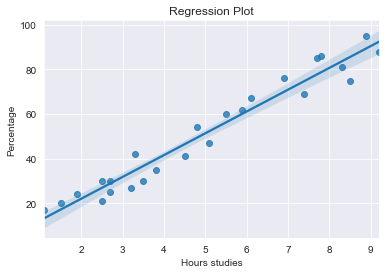

In [21]:
sns.regplot(x = data_df['Hours'], y = data_df['Scores'])
plt.title('Regression Plot')
plt.xlabel('Hours studies')
plt.ylabel('Percentage');

From the regression plot it is confirmed that the parameters are positively correlated

# Box Plot Data Set

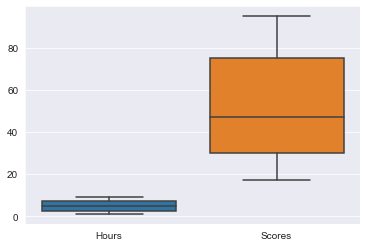

In [22]:
sns.boxplot(data=data_df[['Hours','Scores']]);

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [23]:
X = data_df.iloc[:, :-1].values  
y = data_df.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [25]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [27]:
X_train.shape, X_test.shape 

((20, 1), (5, 1))

Here we can see that 80% of the data is used for training and the rest 20% is used for testing.

### **Training the Algorithm**
We will use the 80% of the training data to train the model.

In [28]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


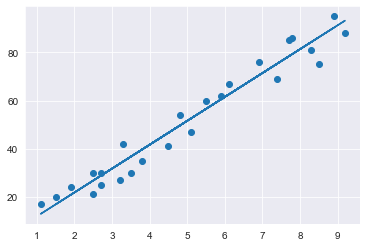

In [29]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now, we will test our algorithm with the rest 20% of the data that we have splitted and make predictions.

In [32]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [35]:
y_pred = regressor.predict(X_test).round()
prediction = pd.DataFrame({'Hours': [i[0] for i in X_test] ,'Predicted Scores':[y for y in y_pred]})
prediction

,Hours,Predicted Scores
0,1.5,17.0
1,3.2,34.0
2,7.4,75.0
3,2.5,27.0
4,5.9,60.0


# Compairing Actual Score Vs. Predicted Score

In [36]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17.0
1,27,34.0
2,69,75.0
3,30,27.0
4,62,60.0


# What will be predicted score if a student studies for 9.25 hrs/ day?

In [45]:
# You can also test with your own data
hours = np.array([[9.25]])
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = %.2f"%own_pred)

No of Hours = 9.25
Predicted Score = 93.69


According to the regression model if a student studies 9.25 hours a day, he/she is likely to score 93.69 marks

### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [46]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.2


### **Model Evaluation Metrics**

In [50]:
#Checking the efficiency of the model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mean_squared_error_value=mean_squared_error(y_test,y_pred)
mean_absolute_error_value=mean_absolute_error(y_test,y_pred)
print(mean_squared_error_value)
print(mean_absolute_error_value)

21.4
4.2
